# 拟合

## 1.Numpy库中的多项式拟合函数polyfit
```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
#### 参数说明：
    x：自变量数据（1D 数组）
    y：因变量数据（1D 数组）
    deg：多项式阶数（整数）
    rcond：拟合的容差（可选）
    full：是否返回诊断信息（默认为 False）
    w：权重（可选）
    cov：是否返回协方差矩阵（默认为 False）
#### 返回值：
    多项式系数（从高次到低次排列的数组）

np.polyval(p, x) 用于计算多项式 P(x) 在给定点 x 的值，其中多项式系数 p 从高次到低次排列。
```python
numpy.polyval(p, x)
```
#### 参数：
    p：多项式系数数组，按幂次降序排列（例如 [a, b, c] 表示 ax^2+bx+c。
    x：输入值（可以是标量、数组或矩阵）。
#### 返回值：
    多项式在 x 处的计算结果（形状与 x 相同）。

拟合二次多项式的从高次幂到低次幂系数分别为: [-9.80454545 20.11972727 -0.02827273]
预测值分别为: [4.388875 5.812575]


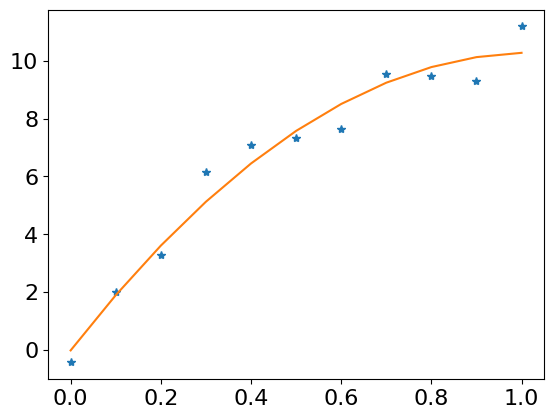

In [3]:
from numpy import polyfit,polyval, array, arange
from matplotlib.pyplot import plot,show,rc

x0 = arange(0,1.1,0.1)
y0 = array([-0.447,1.987,3.28,6.16,7.08,7.34,7.66,9.56,9.48,9.30,11.2])
p = polyfit(x0,y0,2)  #拟合二次多项式
print('拟合二次多项式的从高次幂到低次幂系数分别为:',p)
yhat = polyval(p,[0.25,0.35]); print('预测值分别为:', yhat)
rc('font',size=16)
plot(x0,y0,'*',x0,polyval(p,x0),'-')
show()

## 2.scipy.optimize模块中的函数curve_fit
```python
popt, pocv = curve_fit(func, xdata, ydata)
```
func是拟合的函数

popt是拟合的参数

pcov是参数的协方差矩阵

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

y = lambda x,a,b,c: a*x**2+b*x+c
x0 = np.arange(0,1.1,0.1)
y0 = np.array([-0.447,1.987,3.28,6.16,7.08,7.34,7.66,9.56,9.48,9.30,11.2])
popt, pcov = curve_fit(y,x0,y0)
print('拟合的参数值为:', popt)
print('预测值分别为:', y(np.array([0.25,0.35]), *popt))  #*popt 会将这个数组中的元素 解包 为函数的多个独立参数。

拟合的参数值为: [-9.8045453  20.11972648 -0.02827248]
预测值分别为: [4.38887506 5.81257499]


拟合三个观测变量

In [9]:
import numpy as np
from scipy.optimize import curve_fit

x0 = np.array([6,2,6,7,4,2,5,9])
y0 = np.array([4,9,5,3,8,5,8,2])
z0 = np.array([5,2,1,9,7,4,3,3])
xy0 = np.vstack((x0,y0))
# print(xy0)
def Pfun(t,a,b,c):
    return a*np.exp(b*t[0])+c*t[1]**2
popt, pcov = curve_fit(Pfun, xy0,z0)
print('a,b,c的拟合值为:', popt)

a,b,c的拟合值为: [ 5.08906299e+00 -2.58220708e-03 -2.14508866e-02]


拟合曲面

三个参数的拟合值分别为: [0.99673182 1.99914156 3.00944558]


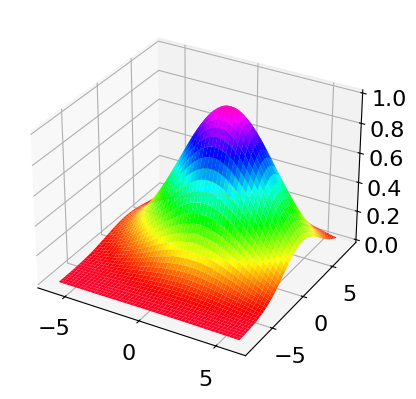

In [15]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

m = 200; n = 300
x = np.linspace(-6,6,m); y = np.linspace(-8,8,n)
x2,y2 = np.meshgrid(x,y)
# print(x2)
x3 = np.reshape(x2,(1,-1)); y3 = np.reshape(y2,(1,-1))
# print(x3)
xy = np.vstack((x3,y3))
def Pfun(t,m1,m2,s):
    return np.exp(-((t[0]-m1)**2+(t[1]-m2)**2)/(2*s**2))
z = Pfun(xy,1,2,3)
zr = z+0.2*np.random.normal(size=z.shape)  #噪声数据
popt, pcov = curve_fit(Pfun,xy,zr)
print('三个参数的拟合值分别为:', popt)
zn = Pfun(xy,*popt)  #计算拟合函数的值
zn2 = np.reshape(zn,x2.shape)
plt.rc('font',size=16)
ax = plt.axes(projection='3d')  #创建一个三维坐标轴对象
ax.plot_surface(x2,y2,zn2,cmap='gist_rainbow')
plt.show()